<a href="https://colab.research.google.com/github/2303a51871/AIML/blob/main/Lab%20Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prediction of Online Retail purchases Calendar ? Pages

Identify the top 5 reasons for most retail sales

Identify the country with most online retail sales Inbox Files

Find the max and min quantity of online retail sales Syllabus

Name the stockade with the most sales

Identify the StockCode with most cancellations Online Retail UCI ML History Quizzes Modules

Apply either Classification Model or Clustering Model to evaluate the dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_excel('/content/Online Retail.xlsx')

In [5]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])  # Convert InvoiceDate to datetime
df['TotalSales'] = df['Quantity'] * df['UnitPrice']  # Add TotalSales colum

Identify the top 5 reasons for most retail sales (EDA)

In [6]:
# Let's find the top 5 most sold products (StockCode)
top_5_products = df.groupby('StockCode')['Quantity'].sum().nlargest(5)
print(f"Top 5 Products by Quantity Sold:\n{top_5_products}")

Top 5 Products by Quantity Sold:
StockCode
22197     56450
84077     53847
85099B    47363
85123A    38830
84879     36221
Name: Quantity, dtype: int64


Identify the country with the most online retail sales


In [7]:
# Group by Country and sum up the TotalSales
country_sales = df.groupby('Country')['TotalSales'].sum().nlargest(1)
print(f"Country with the most sales:\n{country_sales}")

Country with the most sales:
Country
United Kingdom    8187806.364
Name: TotalSales, dtype: float64


Find the max and min quantity of online retail sales

In [8]:
max_quantity = df['Quantity'].max()
min_quantity = df['Quantity'].min()
print(f"Max Quantity Sold: {max_quantity}")
print(f"Min Quantity Sold: {min_quantity}")

Max Quantity Sold: 80995
Min Quantity Sold: -80995


Name the StockCode with the most sales (based on Quantity)

In [9]:
stockcode_most_sales = df.groupby('StockCode')['Quantity'].sum().idxmax()
print(f"StockCode with the most sales: {stockcode_most_sales}")

StockCode with the most sales: 22197


Identify the StockCode with Most Cancellations (Negative Quantities)

In [12]:
df_cancellations = df[df['Quantity'] < 0]  # Filter negative quantities (cancellations)
stockcode_most_cancellations = df_cancellations.groupby('StockCode')['Quantity'].sum().idxmin()
print(f"StockCode with most cancellations: {stockcode_most_cancellations}")

StockCode with most cancellations: 23843


Apply Classification or Clustering Model (e.g., Clustering for Customer Segmentation)

In [10]:
# Create a dataframe of customer features for clustering
customer_features = df.groupby('CustomerID').agg({
    'Quantity': 'sum',  # Total quantity purchased by each customer
    'TotalSales': 'sum',  # Total sales value for each customer
    'UnitPrice': 'mean'  # Average price of products bought by each customer
}).reset_index()

# Drop customers with missing CustomerID
customer_features = customer_features.dropna(subset=['CustomerID'])

# Standardize the features before applying clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features[['Quantity', 'TotalSales', 'UnitPrice']])

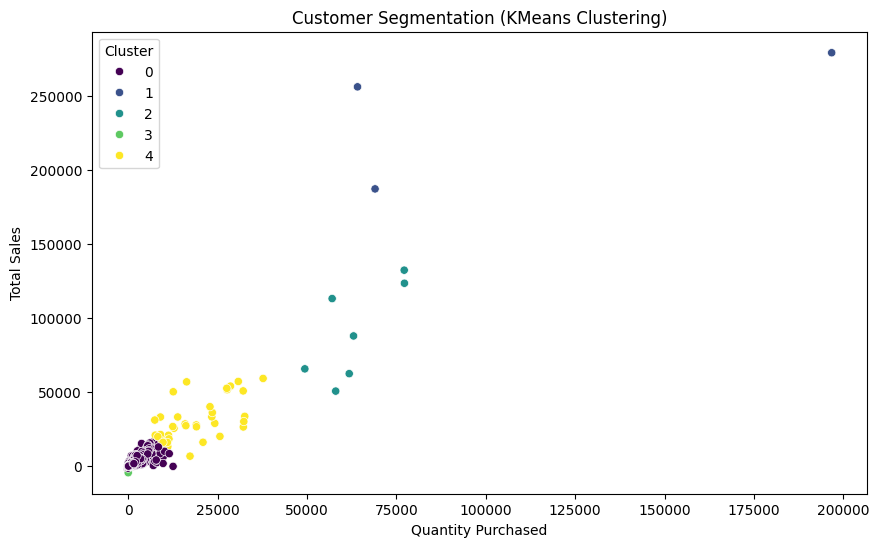

Customer Segments (Average values per cluster):
              Quantity     TotalSales    UnitPrice
Cluster                                           
0           786.168133    1320.166326     5.157763
1        109956.666667  241136.560000     7.988403
2         63381.857143   91030.744286     3.074241
3            29.500000   -1819.065000  6171.705000
4         17586.000000   29585.734762     5.294280


In [11]:
# Apply KMeans clustering to segment customers into 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the clusters (Quantity vs TotalSales)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=customer_features['Quantity'], y=customer_features['TotalSales'], hue=customer_features['Cluster'], palette='viridis')
plt.title('Customer Segmentation (KMeans Clustering)')
plt.xlabel('Quantity Purchased')
plt.ylabel('Total Sales')
plt.show()

# Print out the customer segment means (average values for each cluster)
print(f"Customer Segments (Average values per cluster):\n{customer_features.groupby('Cluster').agg({'Quantity': 'mean', 'TotalSales': 'mean', 'UnitPrice': 'mean'})}")